In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv('data/500_Person_Gender_Height_Weight_Index.csv')

In [31]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [32]:
df = df[['Gender', "Height", "Weight"]]

In [33]:
# 0:남자, 1:여자

df.loc[df.loc[:,"Gender"] == "Male", "Gender"] = 0

In [34]:
df.loc[df.loc[:,"Gender"] == "Female", "Gender"] = 1

In [171]:
X = df.iloc[:, :].values

In [172]:
X

array([[0, 174, 96],
       [0, 189, 87],
       [1, 185, 110],
       ...,
       [1, 141, 136],
       [0, 150, 95],
       [0, 173, 131]], dtype=object)

In [173]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [174]:
from sklearn.cluster import KMeans

wcss = []
for k in np.arange(1,10+1):
    Kmeans = KMeans(n_clusters= k, random_state= 5)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

c:\Users\q1035\anaconda3\envs\lambda39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\q1035\anaconda3\envs\lambda39\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\q1035\anaconda3\envs\lambda39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\q1035\anaconda3\envs\lambda39\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

In [175]:
wcss

[206.6343676819381,
 81.66843464764995,
 64.64203528964211,
 49.12965891395015,
 39.04190954215188,
 30.683079558785696,
 25.491059104610848,
 20.522210598777445,
 18.637784451108132,
 16.890071105507328]

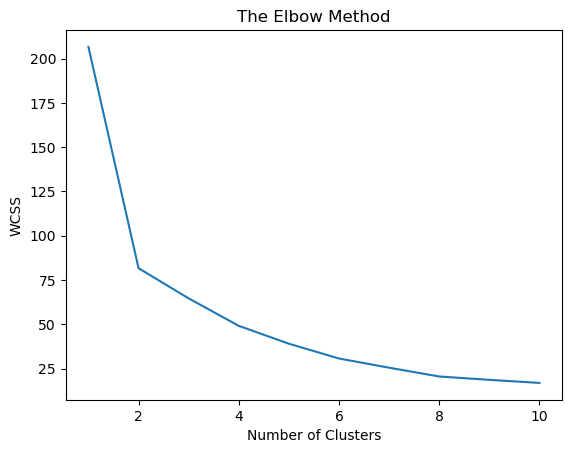

In [176]:
x = np.arange(1,10+1)
plt.plot( x, wcss )
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [177]:
kmeans = KMeans(n_clusters= 4, random_state= 5)

y_pred = kmeans.fit_predict(X)

y_pred

c:\Users\q1035\anaconda3\envs\lambda39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\q1035\anaconda3\envs\lambda39\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 0, 2, 3, 1, 3, 3, 1, 2, 1, 2, 2, 3, 1, 0, 0, 3, 3, 1, 3, 0,
       2, 1, 2, 2, 1, 1, 0, 1, 3, 1, 2, 0, 0, 0, 0, 3, 0, 2, 0, 0, 3, 3,
       0, 1, 0, 1, 3, 3, 0, 2, 3, 1, 1, 2, 1, 1, 2, 3, 2, 0, 1, 1, 1, 0,
       2, 2, 2, 0, 2, 1, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 1, 3, 1, 0, 3,
       2, 0, 0, 2, 0, 1, 1, 0, 3, 3, 1, 2, 1, 3, 3, 0, 0, 1, 3, 3, 0, 3,
       2, 0, 1, 2, 2, 3, 2, 2, 3, 0, 2, 1, 1, 0, 0, 3, 1, 2, 1, 3, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 3, 2, 2, 1, 3, 3, 1, 1, 0, 1, 0, 2, 3, 2, 0,
       0, 2, 2, 3, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 3, 0, 1, 0,
       2, 2, 0, 1, 2, 1, 3, 1, 0, 3, 0, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       0, 1, 1, 1, 2, 1, 3, 2, 3, 0, 1, 2, 2, 3, 0, 0, 2, 0, 0, 2, 0, 3,
       2, 1, 2, 1, 1, 0, 3, 1, 0, 1, 0, 2, 2, 2, 3, 1, 1, 3, 2, 0, 1, 3,
       1, 0, 2, 3, 1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 0, 0, 0, 0, 3, 3, 3, 2,
       3, 3, 1, 3, 3, 1, 3, 3, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 0, 1,
       3, 1, 2, 3, 3, 1, 2, 2, 0, 3, 2, 2, 2, 3, 0,

In [178]:
kmeans

KMeans(n_clusters=4, random_state=5)

In [105]:
## 학습된 kmeans 를 이용하여 새로운 데이터 값 군집 나누기

In [179]:
X[0].reshape(1,3)

array([[0.        , 0.57627119, 0.41818182]])

In [180]:
kmeans.predict(X)

array([1, 1, 0, 2, 3, 1, 3, 3, 1, 2, 1, 2, 2, 3, 1, 0, 0, 3, 3, 1, 3, 0,
       2, 1, 2, 2, 1, 1, 0, 1, 3, 1, 2, 0, 0, 0, 0, 3, 0, 2, 0, 0, 3, 3,
       0, 1, 0, 1, 3, 3, 0, 2, 3, 1, 1, 2, 1, 1, 2, 3, 2, 0, 1, 1, 1, 0,
       2, 2, 2, 0, 2, 1, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 1, 3, 1, 0, 3,
       2, 0, 0, 2, 0, 1, 1, 0, 3, 3, 1, 2, 1, 3, 3, 0, 0, 1, 3, 3, 0, 3,
       2, 0, 1, 2, 2, 3, 2, 2, 3, 0, 2, 1, 1, 0, 0, 3, 1, 2, 1, 3, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 3, 2, 2, 1, 3, 3, 1, 1, 0, 1, 0, 2, 3, 2, 0,
       0, 2, 2, 3, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 3, 0, 1, 0,
       2, 2, 0, 1, 2, 1, 3, 1, 0, 3, 0, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       0, 1, 1, 1, 2, 1, 3, 2, 3, 0, 1, 2, 2, 3, 0, 0, 2, 0, 0, 2, 0, 3,
       2, 1, 2, 1, 1, 0, 3, 1, 0, 1, 0, 2, 2, 2, 3, 1, 1, 3, 2, 0, 1, 3,
       1, 0, 2, 3, 1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 0, 0, 0, 0, 3, 3, 3, 2,
       3, 3, 1, 3, 3, 1, 3, 3, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 0, 1,
       3, 1, 2, 3, 3, 1, 2, 2, 0, 3, 2, 2, 2, 3, 0,

In [181]:
X[0]

array([0.        , 0.57627119, 0.41818182])

In [194]:
new_data = np.array([1	,130.5 ,20.2])

In [195]:
new_data = new_data.reshape(1,3)

In [196]:
new_data = scaler.transform(new_data)

In [197]:
new_data

array([[ 1.        , -0.16101695, -0.27090909]])

In [198]:
kmeans.predict(new_data)[0]

2

In [187]:
import joblib

In [188]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [189]:
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']